In [2]:
import tensorflow as tf
from tensorflow.keras import datasets

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape(10000, 28, 28, 1)

In [4]:
## 모델 구성

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [6]:
## 훈련 시작

import time

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                validation_data= (X_test, y_test))

print("fit time :", time.time() - start_time)

Epoch 1/5


2022-11-24 16:22:53.785372: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-11-24 16:22:54.280315: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8201
2022-11-24 16:22:55.594964: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2022-11-24 16:22:55.596075: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6cf0a57ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-11-24 16:22:55.596087: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2022-11-24 16:22:55.598945: I tensorflow/compiler/mlir/tensorflow/utils/du

1875/1875 [==============================] - 8s 2ms/step - loss: 0.3969 - accuracy: 0.8558 - val_loss: 0.2873 - val_accuracy: 0.8935
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.8987 - val_loss: 0.2622 - val_accuracy: 0.8999
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2311 - accuracy: 0.9140 - val_loss: 0.2505 - val_accuracy: 0.9090
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2017 - accuracy: 0.9233 - val_loss: 0.2446 - val_accuracy: 0.9092
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1730 - accuracy: 0.9342 - val_loss: 0.2516 - val_accuracy: 0.9148
fit time : 24.440277099609375


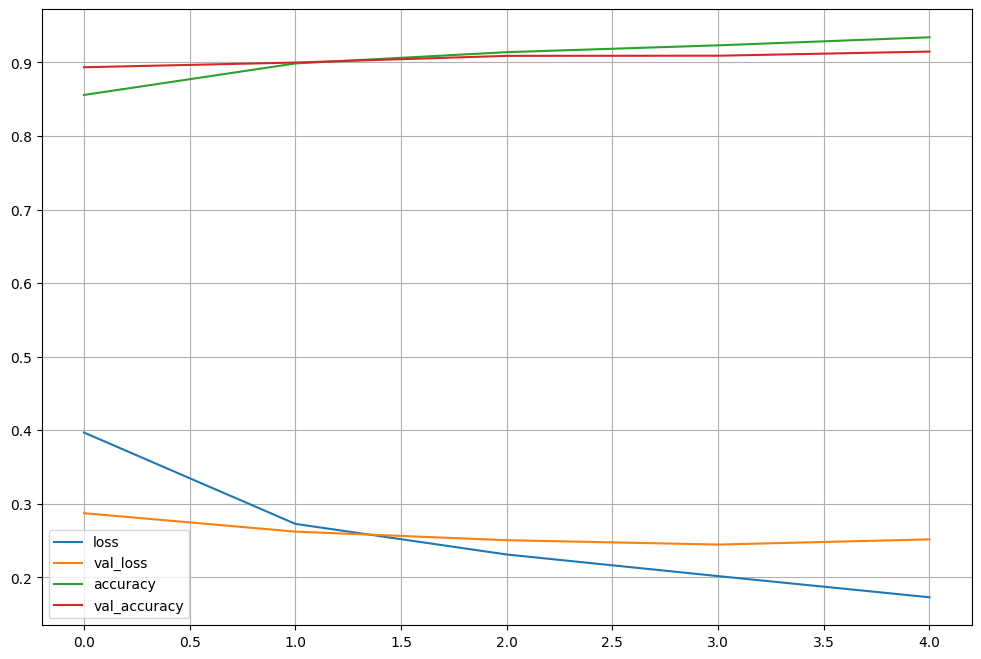

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label= each)
    
plt.legend()
plt.grid()
plt.show()

In [6]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9924
Test loss : 0.024041209369897842
Test accuracy : 0.9923999905586243


In [7]:
## 다시 틀린 데이터 찾으러 가기!!

import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 0s 751us/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [8]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

76

In [9]:
## 다시 틀린것 중 6개만!!

import random

samples = random.choices(population=wrong_result, k=16)
samples

[8094,
 4504,
 4740,
 947,
 1260,
 9792,
 3422,
 3808,
 4740,
 3778,
 9642,
 659,
 1621,
 4382,
 2654,
 4078]

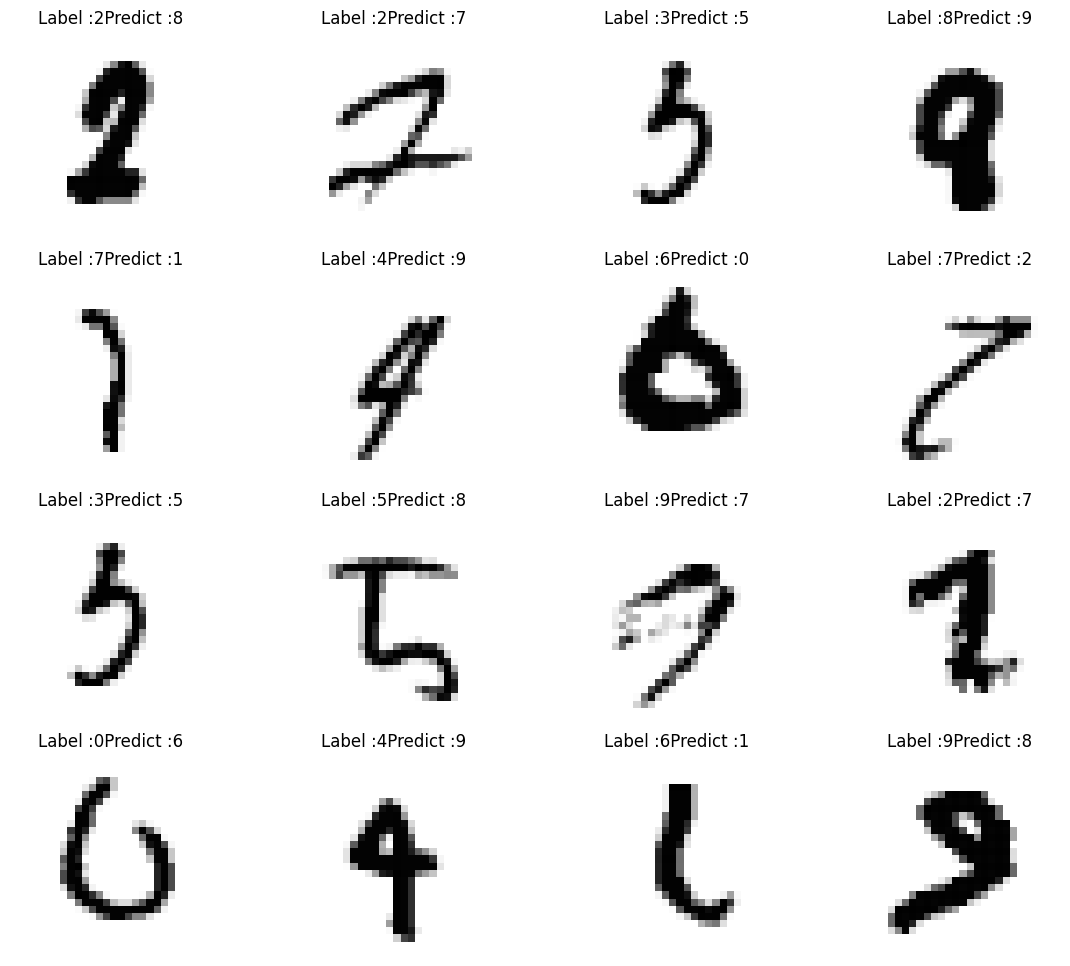

In [10]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label :' + str(y_test[n]) + 'Predict :'+str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

In [11]:
## 모델을 저장!!
# 저장해놓은 모델은 추후에 다시 실행만 가능!!

model.save('MNIST_CNN_model.h5')